In [74]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import sounddevice as sd
import pylab as pl
from scipy.io import wavfile
from scipy import signal
from scipy.linalg import dft
import time


# Trabajo 3 FMPS 

## 1 Convolución Discreta

1. Dada una respuesta impulsional h, escriba las matricez $C_h$ y $C_h^0$. Pruebe que $C_h$ es una matriz de Toeplitz  y  $C_h^0$ una matriz circulante.

Consideraremos una matriz de respuesta impulsional

$$h = 
\begin{bmatrix}
h[0]\\
h[1]\\
\vdots \\
h[N-1]
\end{bmatrix}$$

se sigue por como se definen la convolucion normal:



$$C_{h} = 
\begin{bmatrix}
h[0] & 0 &  \cdots & 0\\
h[1] & h[0] &  \cdots & 0 \\
h[2] & h[1] & \ddots  & \vdots\\
\vdots & \ddots & \ddots & h[0]\\
h[N-1] & h[N-2] &\ddots & h[1] \\
0 & h[N-1] & \cdots & h[2] \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & h[N-1]
\end{bmatrix}_{2N-1xN}
$$

y notamos que está es una matriz de Toeplitz,ya que todas sus diagonales estan compuesta por un único valor.

Ahora ocupando de igual forma la definicion de la convolución circular:



$$C_{h}^{o} = 
\begin{bmatrix}
h[0] & h[N-1] & \cdots & h[1]\\
h[1] & h[0] & \cdots & h[2] \\
\vdots & \vdots & \ddots & \cdots \\
h[N-1] & h[N-2] & \cdots & h[0]
\end{bmatrix}_{NxN}
$$


y notamos que las filas por las que esta compuesta esta matriz van teniendo los mismos valores, pero desplazandose en un espacio, es decir es una matriz circular.




2.Ahora estudiaremos los efectos de borde de la convolución circular.

## 2 Transformadas de Fourier Discreta (DFT) y Rápida(FFT)

La DFT es un operador lineal que se puede representar como una matriz $F_N=[e_o,e_1,...,e_{N-1}]^T$ $\in \mathcal{M}_\mathbb{C}(N,N)$ donde $e_k \in \mathbb{C}$ es la k-ésima función de la base de Fourier:

$$(F_N)_{k,p}=e_k[p]=e^{i\frac{2\pi(p-1)}{N}(k-1)} $$

## 2.1 Funciones básicas y transformada discreta de Fourier (DFT)

1. Calcule las funciones de base de Fourier $e_k$ para todos los índices k para una señal de tamaño N =32. Trazas sus partes reales e imaginarias en una figura.


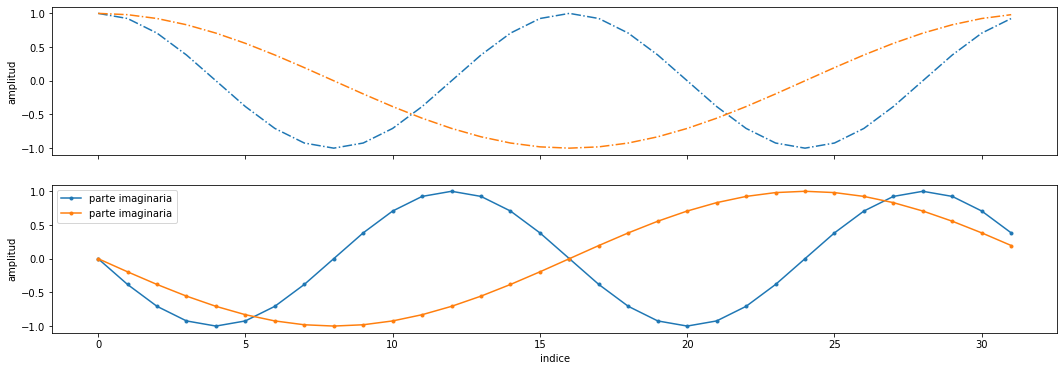

In [241]:
N=32        #valor dado
fig,axes=plt.subplots(2,1,figsize=(18,6),sharex=True)
t = np.arange(0,N,1) 

# calculamos las funciones de base de fourier
for k in range(N-2,N):
    fk=k/N
    wk=2*np.pi*fk
    ek=np.exp(1j*wk*t)
    o1=axes[0].plot(t,np.real(ek),'-.',label='parte real')
    o2=axes[1].plot(t,np.imag(ek),'.-',label='parte imaginaria')

#graficamos    
axes[0].set_ylabel('amplitud')
plt.legend()
axes[1].set_xlabel('indice')
plt.legend()
axes[1].set_ylabel('amplitud');

##### 2- Calcule $F_N$ la matriz de transformada discreta de Fourier (DFT) para N = 1,2,4 Y 32. Para N=32 visualícela las partes realees e imaginarias como una imágen. ¿Qué contienen las líneas de la matriz F_N?

In [242]:
#Necesitamos la matriz para N=1,2,4,32
for N in [1,2,4,32]:
    #definimos variables
    FN=np.zeros(shape=(N,N),dtype=np.complex)
    omegaN=np.exp(1j*2*np.pi/N)
    
    #calculamos la matriz de la DFT y la guardamos en FN
    for i in range(N):
        for j in range(N):
            FN[i,j]= omegaN**(i*j)
    print(f"para N={N}",FN)

para N=1 [[1.+0.j]]
para N=2 [[ 1.+0.0000000e+00j  1.+0.0000000e+00j]
 [ 1.+0.0000000e+00j -1.+1.2246468e-16j]]
para N=4 [[ 1.0000000e+00+0.0000000e+00j  1.0000000e+00+0.0000000e+00j
   1.0000000e+00+0.0000000e+00j  1.0000000e+00+0.0000000e+00j]
 [ 1.0000000e+00+0.0000000e+00j  6.1232340e-17+1.0000000e+00j
  -1.0000000e+00+1.2246468e-16j -1.8369702e-16-1.0000000e+00j]
 [ 1.0000000e+00+0.0000000e+00j -1.0000000e+00+1.2246468e-16j
   1.0000000e+00-2.4492936e-16j -1.0000000e+00+3.6739404e-16j]
 [ 1.0000000e+00+0.0000000e+00j -1.8369702e-16-1.0000000e+00j
  -1.0000000e+00+3.6739404e-16j  5.5109106e-16+1.0000000e+00j]]
para N=32 [[ 1.        +0.j          1.        +0.j          1.        +0.j
  ...  1.        +0.j          1.        +0.j
   1.        +0.j        ]
 [ 1.        +0.j          0.98078528+0.19509032j  0.92387953+0.38268343j
  ...  0.83146961-0.55557023j  0.92387953-0.38268343j
   0.98078528-0.19509032j]
 [ 1.        +0.j          0.92387953+0.38268343j  0.70710678+0.70710678j


<ipython-input-242-0aa31213ddbb>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  FN=np.zeros(shape=(N,N),dtype=np.complex)


la primera linea siempre es de puros 1, ya que se esta elevando algo a 0, para la siguientes lineas tenemos el vector e_1 y asi, sucevimante, obteniendo el valor e_k en la linea k.

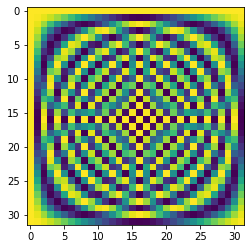

In [248]:
#matriz de euler para N=32
F32=dft(32)
#grafico parte real
plt.imshow(np.real(F32))

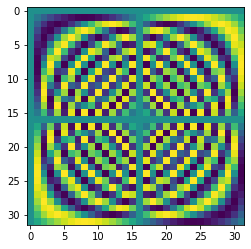

In [249]:
#grafico parte imaginaria
pl.imshow(np.imag(F32))

3-Para una señal de largo $N=1024$ tal que

$$x[n] = \cos (2\pi f_{0}n)$$

con $f_{0} = \frac{k}{N}$ para $k<\frac{N}{2}$ un entero positivo, calcule la matriz $F_{N}$ y aplíquela a la señal $x$. Visualice luego la magnitud del resultado en el dominio frecuencial.

In [227]:
#defiinimos la funcion como se nos indica, y la dejaremos dependiendo del
#largo de la señal N y del valor k
def get_xHat(N,k):
    w0=2*np.pi*f0
    t=np.arange(0,N,1)
    x=np.sin(w0*t)
    Fn=dft(N)
    xHat=(1/N)*Fn.dot(x)
    w=np.arange(-1/2,1/2,1/N)
    
    return(t,x,w,xHat,w0)

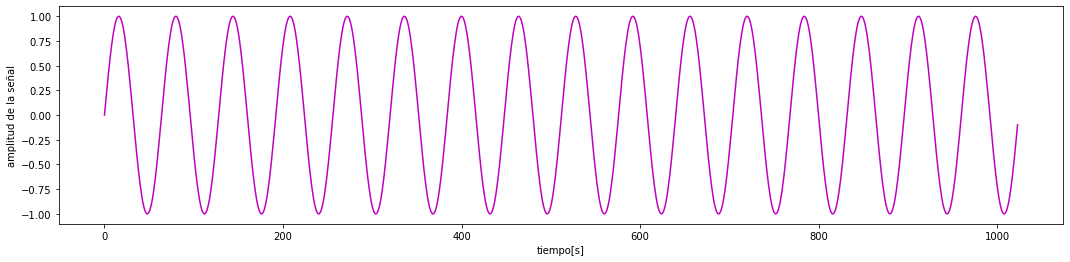

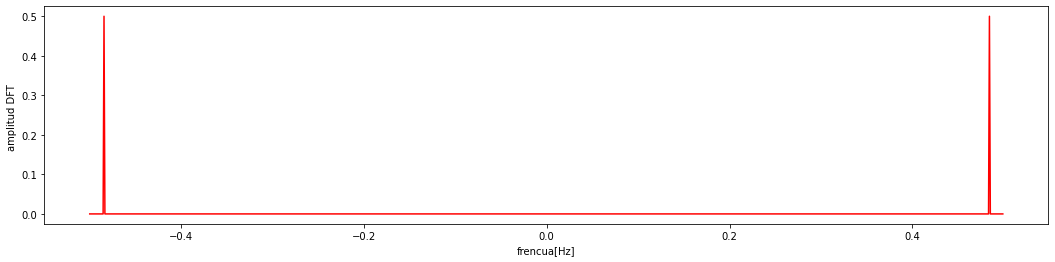

In [231]:
#definimos constantes
N=1024
k=16
f0=k/N

#llamamos a la funcion antes definida, asignando variables
t,x,w,xHat,w0=get_xHat(N,f0)

#grafico de la función en el lado temporal
pl.figure(figsize=(18,4))
pl.plot(t,x,'m-')
pl.ylabel("amplitud de la señal")
pl.xlabel("tiempo[s]")


#grafico de la funcion en el lado espectral
pl.figure(figsize=(18,4))
pl.plot(w,np.abs(xHat),'r-')
pl.ylabel('amplitud DFT ')
pl.xlabel('frencua[Hz]');

##### 4.Cambie el valor de $f_0$ a un valor grande tal que $k>N$ ¿Qué sucede con el espectro?

Text(0.5, 0, 'frencua[Hz]')

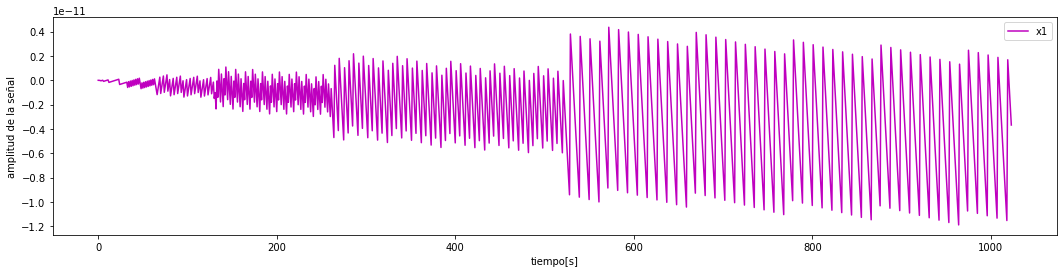

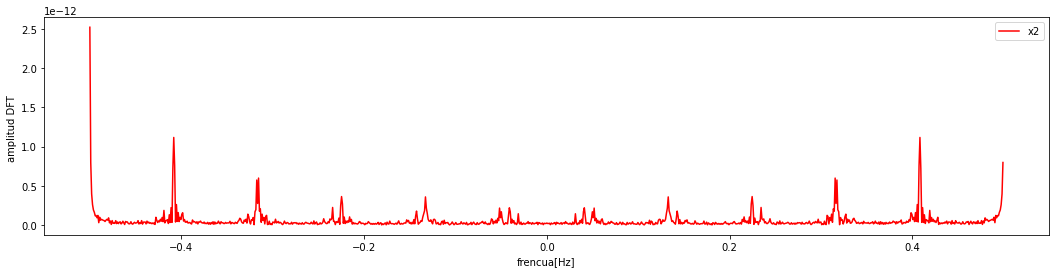

In [54]:
#definimos constantes
k=1024*20
f0=k/N

#llamamos a la funcion antes definida, asignando variables
t,x,w,xHat,w0=get_xHat(N,f0)

#grafico de la función en el lado temporal
pl.figure(figsize=(18,4))
pl.legend()
pl.ylabel("amplitud de la señal")
pl.xlabel("tiempo[s]")

#grafico de la funcion en el lado espectral
pl.figure(figsize=(18,4))
pl.legend()
pl.ylabel('amplitud DFT ')
pl.xlabel('frencua[Hz]')

Ahora en el espectro aparecen más frecuencias con amplitudes considerables,ya que al aumentar k, aumentamos el valor de f0, entonces ahora nuestra funcion que es un seno tendra cambios más bruscos en tiempos muy pequeños.

#### 2.2 Transformada de Fourier Rapida(FFT)

1.Mida el tiempo de calculo de la DFT con y sin calculo previo de la matriz de Fourier para N=1024

In [221]:
#Con el calculo previo de la matriz, tendriamos que haber seguido el siguiente camino:
inicio = time.time()
N=1024
FN=np.zeros(shape=(N,N),dtype=np.complex)
omegaN=np.exp(1j*2*np.pi/N)
for i in range(N):
    for j in range(N):
        FN[i,j]= omegaN**(i*j)

xHat=(1/N)*FN.dot(x)   

fin=time.time()
print("tiempo con el calculo previo de la matriz",fin-inicio,"[s]")

<ipython-input-221-b32d6aa4785e>:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  FN=np.zeros(shape=(N,N),dtype=np.complex)


tiempo con el calculo previo de la matriz 0.8921658992767334 [s]


In [225]:
#si ya tuviesemos calculada la matriz de fourier FN,simplemente es una multiplicación de matricez
inicio = time.time()
xHat=(1/N)*FN.dot(x) 
fin=time.time()
print("tiempo sin calculo previo de la matriz=",fin-inicio,"[s]")

tiempo sin calculo previo de la matriz= 0.0009970664978027344 [s]


2- Usando el método np.fft.fft mida el tiempo del cálculo de la FFT de la misma señal y compárelo con los dos tiempos anteriores.

In [215]:
# usamos el método np.fft.fft y medimos su tiempo:

inicio = time.time()

np.fft.fft(x,n=1024)

fin = time.time()
print("tiempo de ejecucion",fin-inicio,"[s]")

tiempo de ejecucion 0.0009975433349609375 [s]


podemos notar que el tiempo resultante con el metodo np.fft.fft es practicamente igual a calcular la DFT con la matriz de fourier dada, mientras que en comparacion con el que no nos dan la matriz de fourier, la diferencia es notable dando un tiempo de duración en la ejecución aprox de $10^3$ veces más que el fft.

3- Calcule y almacene el tiempo computacional de la DFT, DFT con la matriz precalculada y la FFT para $N= 2k$ muestreados logarítmicamente de $k=2$ a $k=12$. Trace un gráfico log vs log con los diferentes tiempos compuacionales en función de N. Discuta lo observado.

<ipython-input-119-b4489a67b76c>:13: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  FN=np.zeros(shape=(N,N),dtype=np.complex)


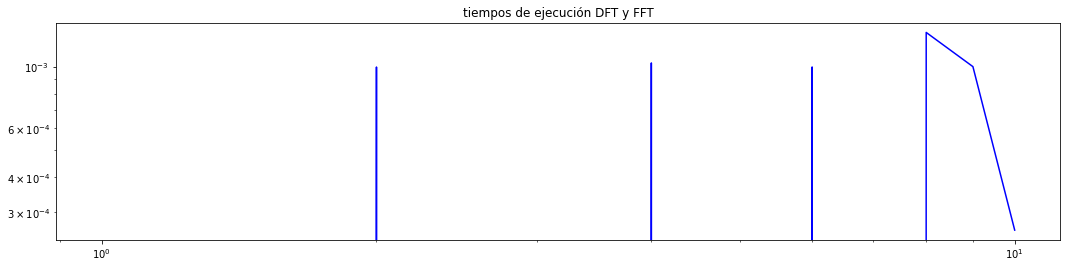

In [119]:
#listas donde almacenaremos valores necesarios.
timedft = []
timedftpre = []
timefft = []
FNN=[]

# tiempo de ejecución del dft si tenemoes que calcular la matriz para cada k.
AUX=np.arange(2,13)
for k in AUX:
    inicio = time.time()
    
    N=2*k
    FN=np.zeros(shape=(N,N),dtype=np.complex)
    omegaN=np.exp(1j*2*np.pi/N)
    for i in range(N):
        for j in range(N):
            FN[i,j]= omegaN**(i*j)
            
    xHat=(1/N)*FN.dot(x[:2*k])
       
    fin = time.time()
    timedft.append(fin-inicio)
    FNN.append(FN)   

# tiempo de ejecución del dft con la matriz dada para cada k.
for k in AUX:
    inicio = time.time()
    xHat=(1/N)*FNN[k-2].dot(x[:2*k])
    fin = time.time()
    timedftpre.append(fin-inicio)
       
#tiempo de ejecucion ocupando la fft  
for k in AUX:
    inicio = time.time()
    np.fft.fft(x,n=2*k)
    fin=time.time()
    timefft.append(fin-inicio)
    
# procedemos a graficar con la escala logaritmica que nos pedia el problema.


plt.figure(figsize=(18,4))
plt.title('tiempos de ejecución DFT y FFT')
plt.loglog(timedft,'b')
plt.loglog(timedftpre,'y')
plt.loglog(timefft,'g')


vemos que al ser N un valor tan pequeño el tiempo para calcular la dft con la matriz ya dada es siempre 0, al igual que con la fft,pero en cambio si no tuviesemos la matriz dada para calcular la dft tenemos tiempos de demoras que en teoria al aumentar el k iran creciendo mucho.

### 3- Interpretación de las señales

Para todas las señales que se describen a continuación, siga los siguientes pasos:

1. Cargue la señal en la memoria y almacene tanto la señal $x$ como la frecuencia de muestreo $f_s$
2. Trace la señal en el tiempo con el eje $x$ adecuado
3. Grafique la magnitud de la señal FFT con la frecuencia real correspondiente centrada en 0.
4. Interprete y discuta las propiedades de la señal en frecuencia utilizando la información proporcionada sobre cada señal en las descripciones a continuación. Cuando sea posible, recupere parámetros físicos como la constante de tiempo de las frecuencias fundamentales de las señales. Puede hacer zoom en parte de un gráfico utilizando $pl.xlim([xmin,xmax]).$

para la primera señal A4.wav 

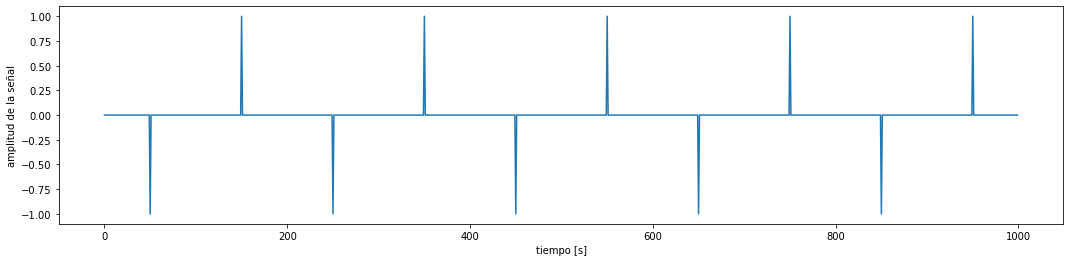

In [201]:
#3.1
fs,x=wavfile.read('A4.wav')
#3.2
t=np.arange(0,len(x)/fs,1/fs)
plt.figure(figsize=(18,4))
k=1000
plt.plot(t[:k],x[:k])
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud de la señal');

Text(0, 0.5, 'magnitud')

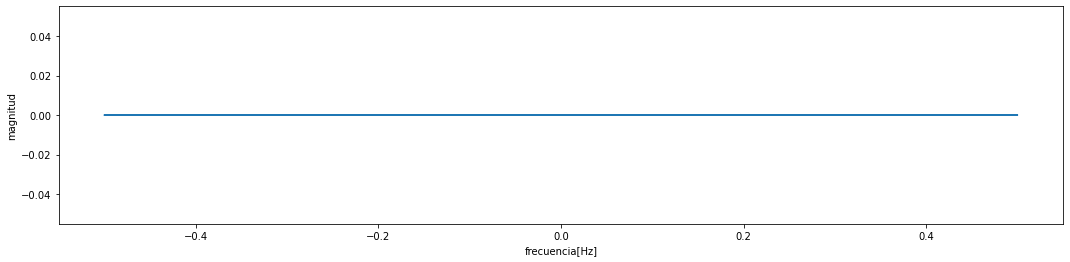

In [203]:
#3.3
xHat=np.fft.fft(x)
freq=np.fft.fftfreq(len(x),1/fs)
plt.figure(figsize=(18,4))
plt.plot(freq,xHat.real)
plt.xlabel('frecuencia[Hz]')
plt.ylabel('magnitud')

para la segunda señal A4clip.wav 

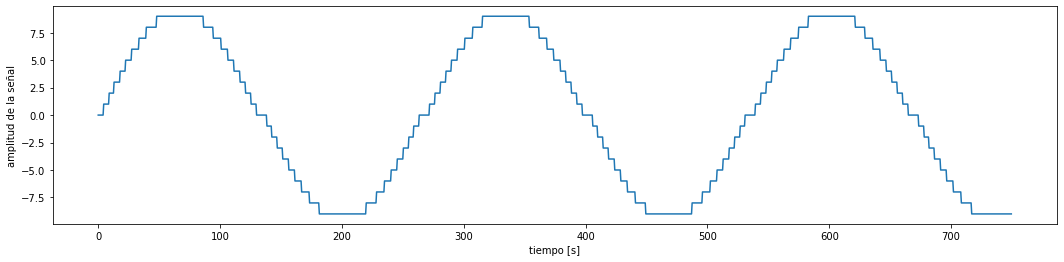

In [205]:
#3.1
fs,x=wavfile.read('A4clip.wav')
#3.2
t=np.arange(0,len(x)/fs,1/fs)
plt.figure(figsize=(18,4))
k=1500
plt.plot(t[:k],x[:k])
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud de la señal');

Text(0, 0.5, 'magnitud')

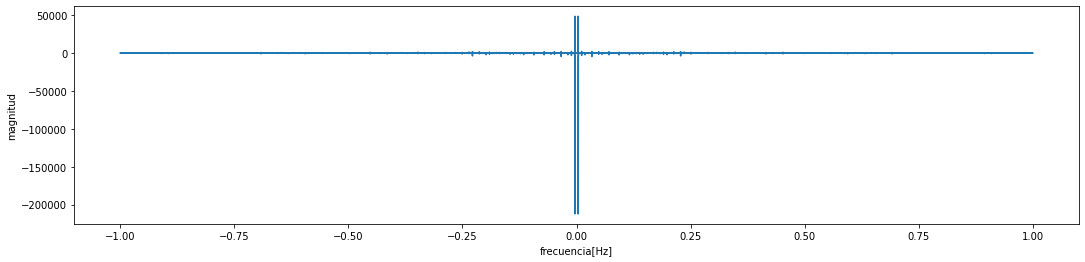

In [206]:
#3.3
xHat=np.fft.fft(x)
freq=np.fft.fftfreq(len(x),1/fs)
plt.figure(figsize=(18,4))
plt.plot(freq,xHat.real)
plt.xlabel('frecuencia[Hz]')
plt.ylabel('magnitud')

para la terceraa señal seq.wav

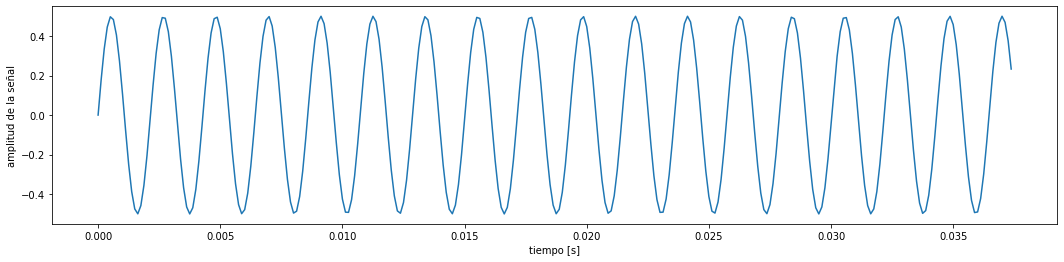

In [207]:
#3.1
fs,x=wavfile.read('seq.wav')
#3.2
t=np.arange(0,len(x)/fs,1/fs)
plt.figure(figsize=(18,4))
k=300
plt.plot(t[:k],x[:k])
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud de la señal');

Text(0, 0.5, 'magnitud')

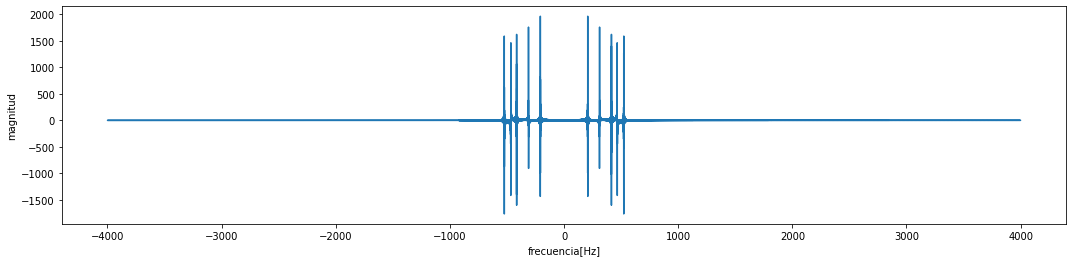

In [208]:
#3.3
xHat=np.fft.fft(x)
freq=np.fft.fftfreq(len(x),1/fs)
plt.figure(figsize=(18,4))
plt.plot(freq,xHat.real)
plt.xlabel('frecuencia[Hz]')
plt.ylabel('magnitud')

para la cuarta señal chirp.wav

In [250]:
#NO LA ENCONTRE

para la quinta señal uku.wav

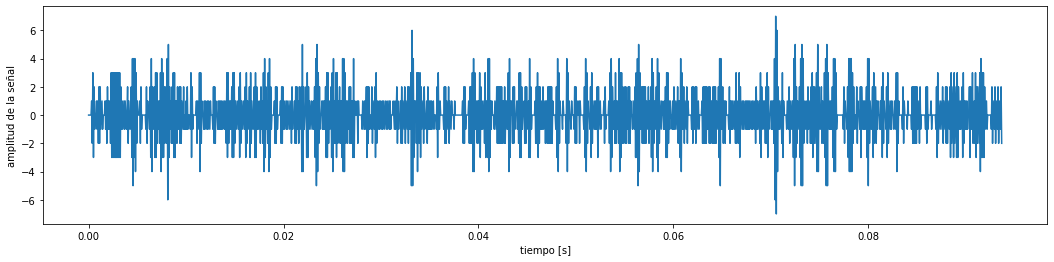

In [209]:
#3.1
fs,x=wavfile.read('uku.wav')
#3.2
t=np.arange(0,len(x)/fs,1/fs)
plt.figure(figsize=(18,4))
k=1500
plt.plot(t[:k],x[:k])
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud de la señal');

Text(0, 0.5, 'magnitud')

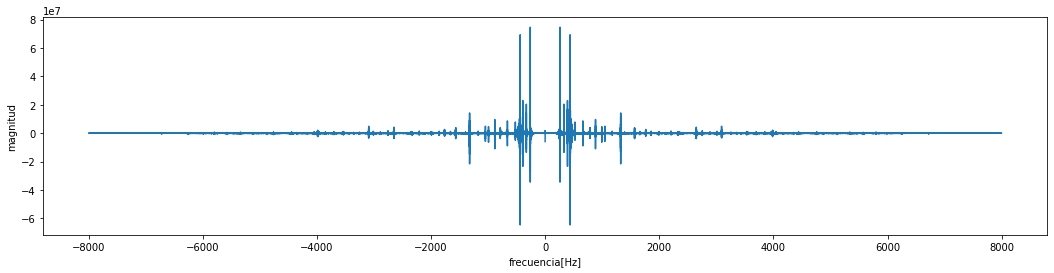

In [210]:
#3.3
xHat=np.fft.fft(x)
freq=np.fft.fftfreq(len(x),1/fs)
plt.figure(figsize=(18,4))
plt.plot(freq,xHat.real)
plt.xlabel('frecuencia[Hz]')
plt.ylabel('magnitud')

para la sexta señal drum.wav

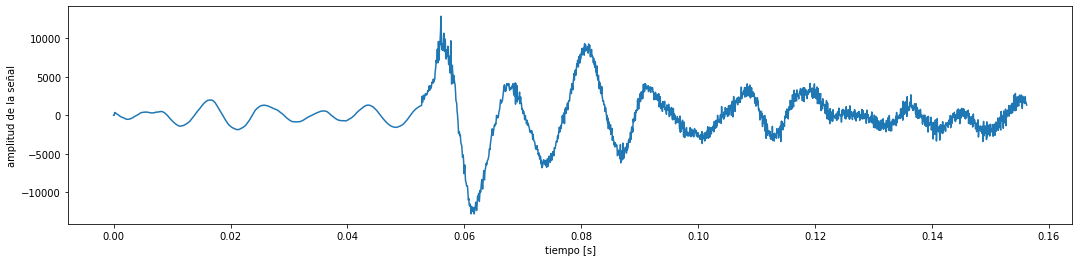

In [211]:
#3.1
fs,x=wavfile.read('drum.wav')
#3.2
t=np.arange(0,len(x)/fs,1/fs)
plt.figure(figsize=(18,4))
k=2500
plt.plot(t[:k],x[:k])
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud de la señal');

Text(0, 0.5, 'magnitud')

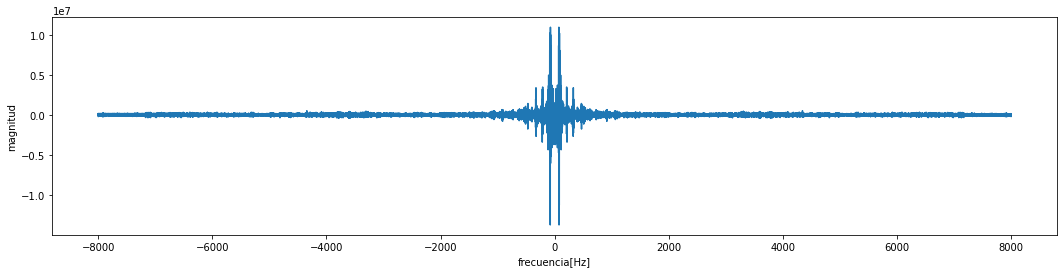

In [212]:
#3.3
xHat=np.fft.fft(x)
freq=np.fft.fftfreq(len(x),1/fs)
plt.figure(figsize=(18,4))
plt.plot(freq,xHat.real)
plt.xlabel('frecuencia[Hz]')
plt.ylabel('magnitud')

para la septima señal stairway.wav y stairwayb.wav

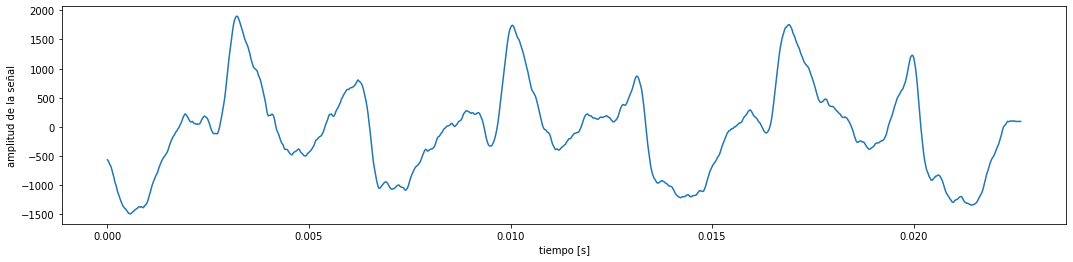

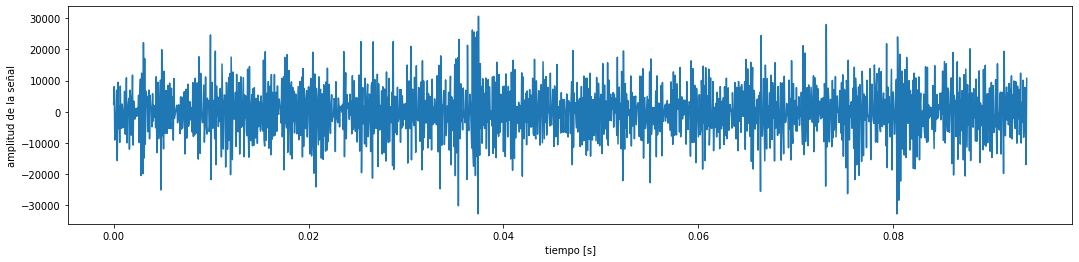

In [251]:
#3.1
fs,x=wavfile.read('stairway.wav')
#3.2
t=np.arange(0,len(x)/fs,1/fs)
plt.figure(figsize=(18,4))
k=1000
plt.plot(t[:k],x[:k])
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud de la señal');
#3.1
fs1,x1=wavfile.read('stairwayb.wav')
#3.2
t1=np.arange(0,len(x)/fs1,1/fs1)
plt.figure(figsize=(18,4))
k=1500
plt.plot(t1[:k],x1[:k])
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud de la señal');

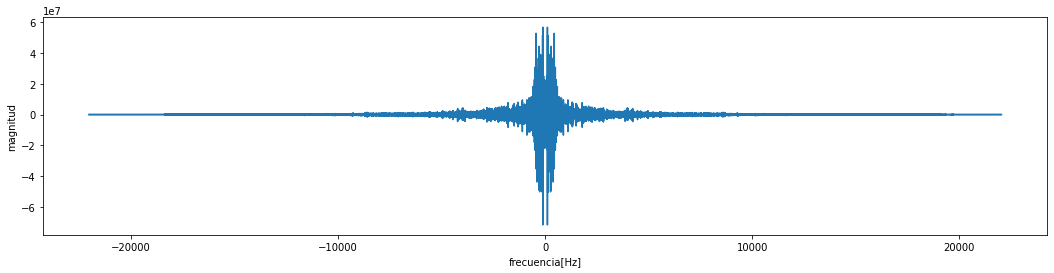

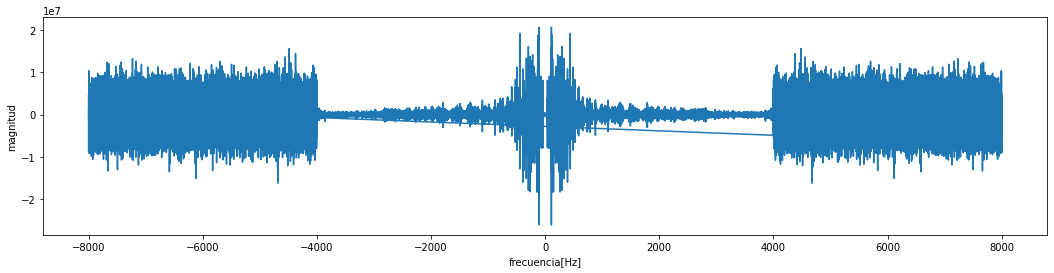

In [253]:
#3.3
xHat=np.fft.fft(x)
freq=np.fft.fftfreq(len(x),1/fs)
plt.figure(figsize=(18,4))
plt.plot(freq,xHat.real)
plt.xlabel('frecuencia[Hz]')
plt.ylabel('magnitud')
#3.3

#3.3
xHat1=np.fft.fft(x1)
freq1=np.fft.fftfreq(len(x1),1/fs1)
plt.figure(figsize=(18,4))
plt.plot(freq1,xHat1.real)
plt.xlabel('frecuencia[Hz]')
plt.ylabel('magnitud');

para la octava señal ecg.npz

In [289]:
#fs,x=wavfile.read('ecg.npz')
a=np.load('ecg.npz')

In [290]:
a

para la novena señal conso.npz

In [ ]:
#no me funciona cargar archivos .npz

## 4 Filtraje Digital

### 4.1Filtraje Digital

1. Cargue la señal en el archivo "stairwayb.wav". Intentaremos atenuar el ruido presente en el audio cortando toda la banda de la frecuencia donde hay ruido

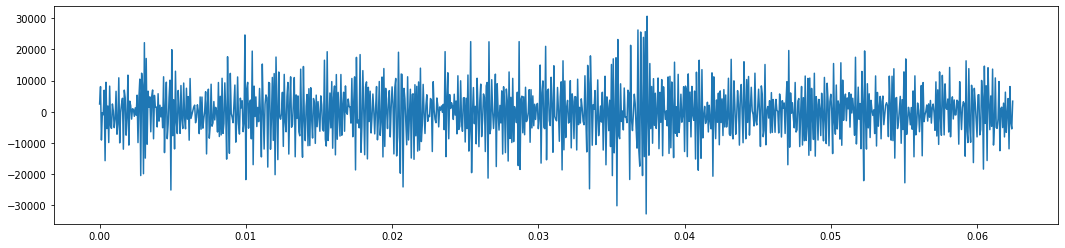

In [268]:
#leemos la señal
fs,x=wavfile.read('stairwayb.wav')

#graficamos esta señal con un sampleo de espacio 1/frecuencia de la señal.
pl.figure(figsize=(18,4))
k=1000
t=np.arange(0,len(x)/fs,1/fs)
plt.plot(t[:k],x[:k]);   #graficamos en un zoom


2 Calcule la FFT de la señal y grafique su magnitud en el dominio de Fourier. Seleccione una frecuencia de corte $f_c$ para un filtro de paso bajo ideal.

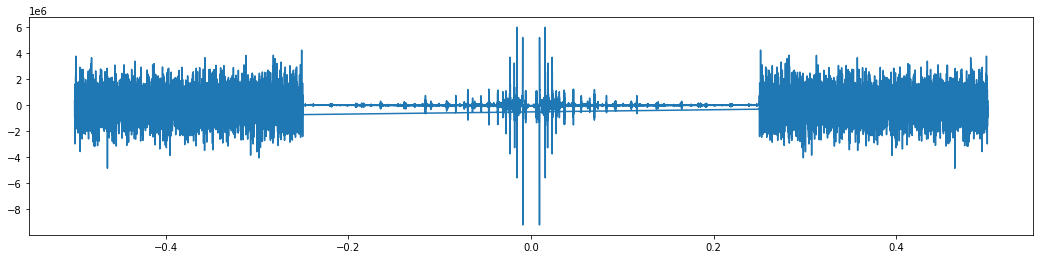

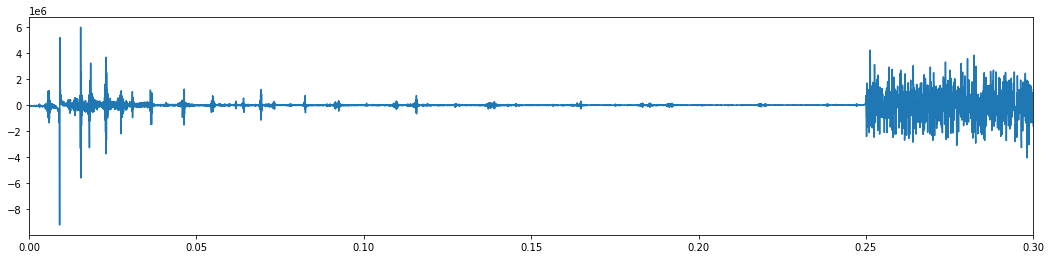

In [269]:
n=2**14
xHat=np.fft.fft(x,n=n)
freq=np.fft.fftfreq(n,-1)

#grafico de la fft en su dominio de fourier.
pl.figure(figsize=(18,4))
pl.plot(freq,xHat.real)

#zoom en el lado postiivo entre 0 y 0.3 para determinar mejor una frecuencia de corte
pl.figure(figsize=(18,4))
pl.plot(freq[int(n/2):],xHat.real[int(n/2):])
pl.xlim([0,0.3]);

3.Aplique el filtro ideal "Band-pass" con una frecuencia de corte $f_c$. Escuche la señal filtrada. Tenga en consideración que guardar un archivo .wav en formato flotante recorta loa valores entre -1 y 1, por lo que la señal se debe escalar correctamente para evitar saturación.

(16384,)


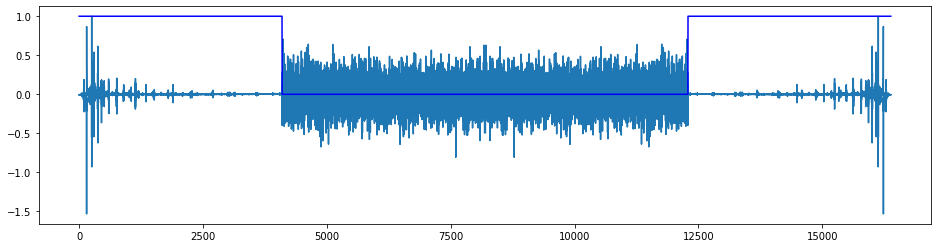

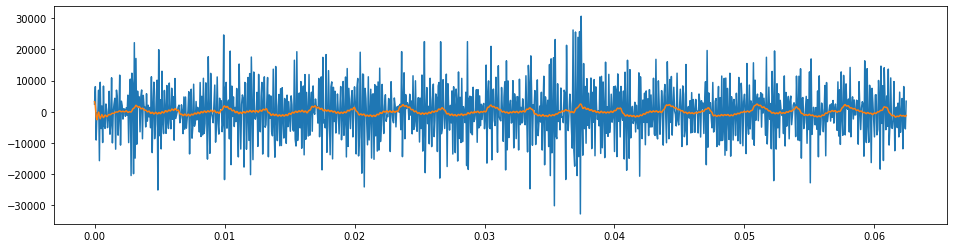

In [291]:
#vemos del grafico anterior que una buena frecuencia de corte puede ser 0.25
fc=0.25

#creamos el filtro
Nc=int(fc*n)
window=np.zeros(n)
window[0:Nc]=1
window[n-Nc:]=1
print(window.shape)


#graficamos en el lado espectral
pl.figure(figsize=(16,4))
pl.plot(xHat.real/np.max(xHat.real))
pl.plot(window,'b-',)

#aplicamos el filtro y calculamos la fft inversa.
xHatFilt=np.multiply(xHat,window)
xFilt=np.fft.ifft(xHatFilt)

#graficamos lado temporal antes y despues del filtro
pl.figure(figsize=(16,4))
pl.plot(t[:k],x[:k])
pl.plot(t[:k],xFilt[:k].real);


#escuchamos como queda la melodia sin ruido
sd.play(xFilt.real/np.max(xFilt.real),fs)
sd.wait()  

4.Utilice un filtro ideal para seleccionar solo la nota con la frecuencia más baja en la señal "seq.wav".Escuche la señal filtrada para comprobar que solo queda una nota

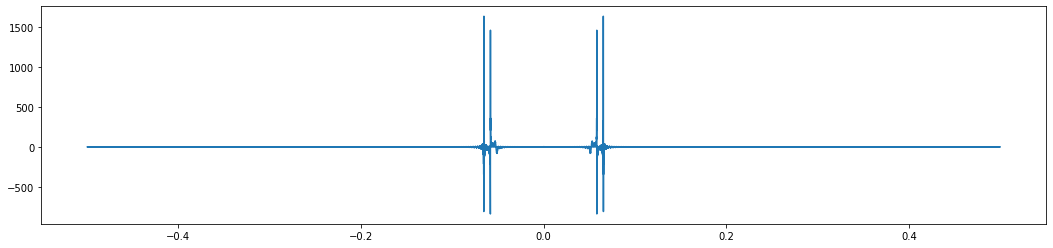

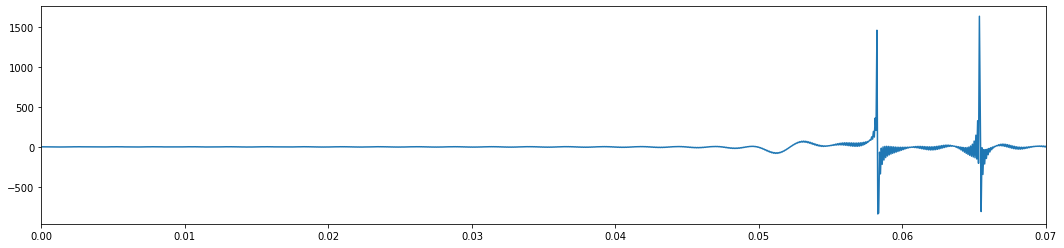

In [299]:
fs,x=wavfile.read('seq.wav')
n=2**14

#analisis espectral
xHat=np.fft.fft(x,n=n)
freq=np.fft.fftfreq(n,-1)
#grafico de la fft en su dominio de fourier.
pl.figure(figsize=(18,4))
pl.plot(freq,xHat.real)

#zoom en el lado postiivo entre 0 y 0.3 para determinar mejor una frecuencia de corte
pl.figure(figsize=(18,4))
pl.plot(freq[int(n/2):],xHat.real[int(n/2):])
pl.xlim([0,0.07]);

#sd.play(x.real/np.max(x.real),fs)
#sd.wait()  

In [310]:
for k in np.arange(1000):
    if xHat.real[k]>1000:
        print(k/n)
              
fc=k/n           

0.0582275390625


In [313]:
#creamos el filtro
Nc=int(fc*n)
window=np.zeros(n)
window[0:Nc]=1
window[n-Nc:]=1
print(window.shape)

#aplicamos el filtro y calculamos la fft inversa.
xHatFilt=np.multiply(xHat,window)
xFilt=np.fft.ifft(xHatFilt)

#escuchamos como queda la melodia sin ruido
sd.play(xFilt.real/np.max(xFilt.real),fs)
sd.wait()  

(16384,)


In [ ]:
### 4.2 Diseño de filtros digitales

1.Calcule los coeficientes de un filtro Butterworth FIR,